In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy import signal
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import seaborn as sns

SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
LINEWIDTH = 4
MARKERSIZE = 5
FIGSIZE = (9.652,9.652)
palette = sns.color_palette("colorblind")

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=LINEWIDTH)  # 
plt.rc('lines', markersize=MARKERSIZE)  # 

# Dark Count Characterizations

We are interested in looking at:

1. DCR vs Excess Volt
2. Vbd vs. Temp.
3. DCR vs. Temp.

## DCR vs. Excess

In [5]:
def read_dcrate(filename):
    data = np.loadtxt(filename,skiprows=2)
    vbd = data[:,0][1:]-data[:,0][0]
    dcr = data[:,1][1:]
    dcerr = data[:,2][1:]
    return vbd,dcr,dcerr

def linearfit(x,y):
    fitfunc = lambda x_,m,c : m*x_+c
    popt,pcov = curve_fit(fitfunc,x,y)
    print(popt)
   # print(fitfunc(x,*popt))
    return fitfunc(x,*popt)

def expfit(x,y,finalx=None):
    fitfunc = lambda x_,a,b: a*np.exp(x_*b)
    popt,pcov = curve_fit(fitfunc,x,y)
    print(popt)
   # print(fitfunc(x,*popt))
    if len(finalx)>0:
        return fitfunc(finalx,*popt)
    else:
        return fitfunc(x,*popt)

[143.2849998  -14.66500015]


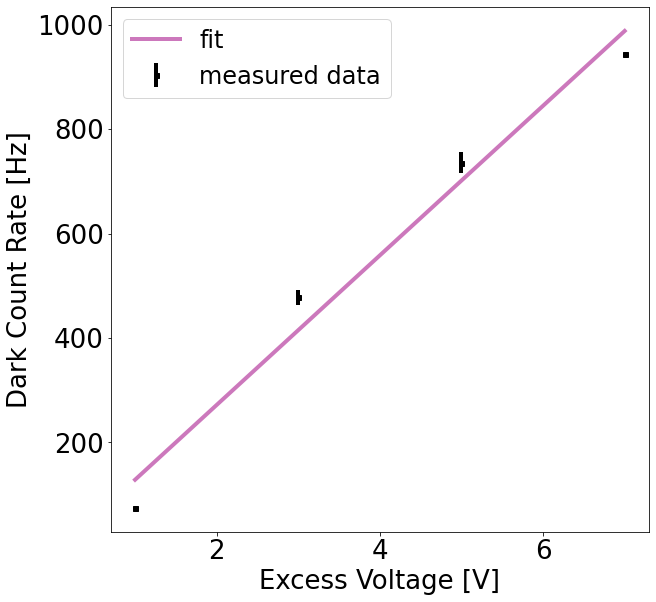

In [6]:
vbdm2C, dcrm2C,dcerrm2C = read_dcrate("210609-dcrate-m2C")

plt.figure(figsize=FIGSIZE)
plt.errorbar(vbdm2C,dcrm2C,yerr=dcerrm2C,label="measured data",marker='s',linestyle='',markersize=5,color="black")
plt.plot(vbdm2C,linearfit(vbdm2C,dcrm2C),color=palette[4],label='fit')
plt.xlabel("Excess Voltage [V]")
plt.ylabel("Dark Count Rate [Hz]")
plt.legend()
plt.savefig("DCR-EV.svg",dpi=300)
plt.show()

## Breakdown voltage vs Temperature

In [7]:
def read_tempvbd(filename):
    tempVbd = np.loadtxt(filename,skiprows=1)
    temp = tempVbd[:,0]
    vbd = tempVbd[:,1]
    return temp,vbd

In [15]:
temp1,vbd1 = read_tempvbd("210607-Vbdtemp1")
tempvbdfunc = interp1d(temp1,vbd1)

[  0.75410193 187.87812301]


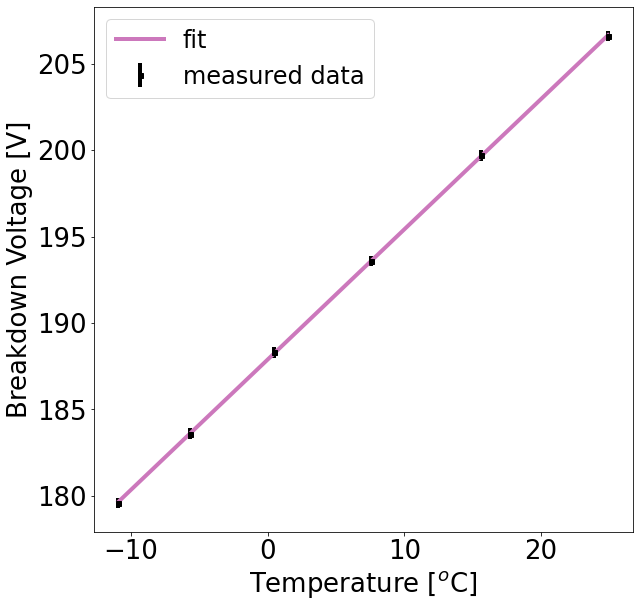

In [9]:
plt.figure(figsize=FIGSIZE)
plt.errorbar(temp1,vbd1,yerr=np.ones(len(vbd1))*0.3,marker='s',linestyle='',color="black",markersize=5,label='measured data')
plt.plot(temp1,linearfit(temp1,vbd1),color=palette[4],label='fit')

# error is 0.3V for all since that was the average fluctuation observed on the multimeter during measurements
#plt.plot(temp2,vbd2,label='Dateset 2')
plt.xlabel("Temperature [$^o$C]")
plt.ylabel("Breakdown Voltage [V]")
plt.legend()
plt.savefig("Vbd-temp.svg",dpi=300)
plt.show()

## Dark Count Rate vs. Temperature

In [10]:
def read_tempdcr(filename):
    tempdcr = np.loadtxt(filename,skiprows=1)
    temp = tempdcr[:,0]
    dcr = tempdcr[:,1]
    err = tempdcr[:,2]
    return temp,dcr,err

In [11]:
temp1,dcr1,err1 = read_tempdcr("210607-dcrtemp1")
temp2,dcr2,err2 = read_tempdcr("210607-dcrtemp2")
tempdcrfunc = interp1d(temp1,dcr1)
tempdcrfunc(-5)

datasheetData = np.loadtxt("dcr-temp-datasheet.csv",delimiter=',')
datasheetTemp,datasheetDCR = datasheetData[:,0],datasheetData[:,1]
datasheetInterp = interp1d(datasheetTemp,datasheetDCR)

[1.10157905e+02 6.83803851e-02]


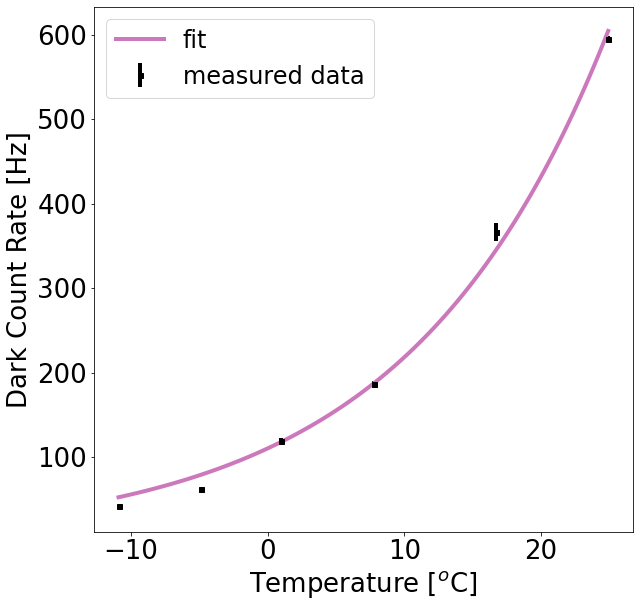

In [12]:
plt.figure(figsize=FIGSIZE)

xnums = np.linspace(min(temp1),max(temp1),100)
# plt.plot(datasheetTemp,datasheetDCR,label='Datasheet Curve')
plt.errorbar(temp1,dcr1,yerr=err1,marker='s',linestyle='',color="black",markersize=5,label='measured data')
plt.plot(xnums,expfit(temp1,dcr1,finalx=xnums),color=palette[4],label='fit')

#plt.errorbar(temp2,dcr2,yerr=err2,marker='s',linestyle='',color=palette[1],markersize=5)
plt.xlabel("Temperature [$^o$C]")
plt.ylabel("Dark Count Rate [Hz]")
plt.legend()
plt.savefig("DCR-temp.svg",dpi=300)
plt.show()